In [107]:
import pandas as pd
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [108]:
## Reading in the data
df = pd.read_csv("./Auto.csv")

In [109]:
## Printing the head and dimensions
print(df.head(10))
print(df.shape)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year   
0  18.0          8         307.0         130    3504          12.0  70.0  \
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   
5  15.0          8         429.0         198    4341          10.0   NaN   
6  14.0          8         454.0         220    4354           9.0  70.0   
7  14.0          8         440.0         215    4312           8.5  70.0   
8  14.0          8         455.0         225    4425          10.0  70.0   
9  15.0          8         390.0         190    3850           8.5  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3      

In [110]:
## Exploring the data
print("Exploring Some Columns")
columns = ['mpg', 'weight', 'year']
for col in columns:
    print("Exploring data in", col, "column")
    print(df[col].describe())
    print()

Exploring Some Columns
Exploring data in mpg column
count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

Exploring data in weight column
count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64

Exploring data in year column
count    390.000000
mean      76.010256
std        3.668093
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: year, dtype: float64



In [111]:
# Types of each column
for column in df:
    print("Name of Column: ", column)
    print("Type of Column: ", type(column[0]))

Name of Column:  mpg
Type of Column:  <class 'str'>
Name of Column:  cylinders
Type of Column:  <class 'str'>
Name of Column:  displacement
Type of Column:  <class 'str'>
Name of Column:  horsepower
Type of Column:  <class 'str'>
Name of Column:  weight
Type of Column:  <class 'str'>
Name of Column:  acceleration
Type of Column:  <class 'str'>
Name of Column:  year
Type of Column:  <class 'str'>
Name of Column:  origin
Type of Column:  <class 'str'>
Name of Column:  name
Type of Column:  <class 'str'>


In [112]:
# Changing the type of cylinder using cat.codes
df['cylinders'] = df['cylinders'].astype("category").cat.codes
print("New Type of Cylinder is: ", df["cylinders"].dtype)

New Type of Cylinder is:  int8


In [113]:
# Changing the type of origin
df['cylinders'] = df['cylinders'].astype("category")
print("New Type of Cylinder is: ", df["cylinders"].dtype)

New Type of Cylinder is:  category


In [114]:
for column in df:       
    print("Old number of NA's in column", column, ": ", df[column].isna().sum())
    selRows = df[df[column].isna()].index
    df = df.drop(selRows, axis=0)
    print("New number of NA's in column", column, ": ", df[column].isna().sum())
print()
print("New Shape: ", df.shape)

Old number of NA's in column mpg :  0
New number of NA's in column mpg :  0
Old number of NA's in column cylinders :  0
New number of NA's in column cylinders :  0
Old number of NA's in column displacement :  0
New number of NA's in column displacement :  0
Old number of NA's in column horsepower :  0
New number of NA's in column horsepower :  0
Old number of NA's in column weight :  0
New number of NA's in column weight :  0
Old number of NA's in column acceleration :  1
New number of NA's in column acceleration :  0
Old number of NA's in column year :  2
New number of NA's in column year :  0
Old number of NA's in column origin :  0
New number of NA's in column origin :  0
Old number of NA's in column name :  0
New number of NA's in column name :  0

New Shape:  (389, 9)


In [115]:
## Change the mpg category
avg = df['mpg'].sum() / len(df)
print("The average mpg is: ", avg)
df['mpg_high'] = 0
df['mpg_high'][df['mpg'] > avg] = 1
df['mpg_high'] = df['mpg_high'].astype("category")
df = df.drop(['mpg', 'name'], axis=1)
print(df.head())

The average mpg is:  23.490488431876607
  cylinders  displacement  horsepower  weight  acceleration  year  origin   
0         4         307.0         130    3504          12.0  70.0       1  \
1         4         350.0         165    3693          11.5  70.0       1   
2         4         318.0         150    3436          11.0  70.0       1   
3         4         304.0         150    3433          12.0  70.0       1   
6         4         454.0         220    4354           9.0  70.0       1   

  mpg_high  
0        0  
1        0  
2        0  
3        0  
6        0  


C:\Users\Eric\AppData\Local\Temp\ipykernel_18256\562280206.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mpg_high'][df['mpg'] > avg] = 1


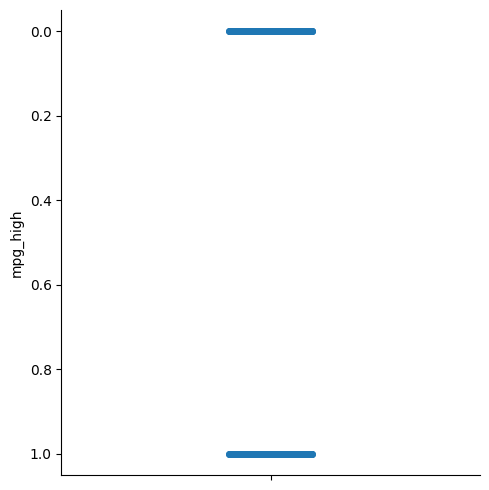

In [116]:
seaborn.catplot(df['mpg_high'])
## Only has values 1 and 0

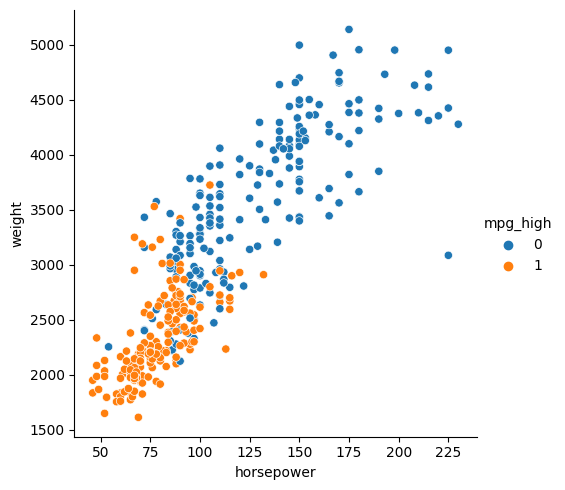

In [117]:
seaborn.relplot(x=df['horsepower'], y=df['weight'], hue=df['mpg_high'])
#Less weight and horsepower means higher that average mpg

<Axes: xlabel='mpg_high', ylabel='weight'>

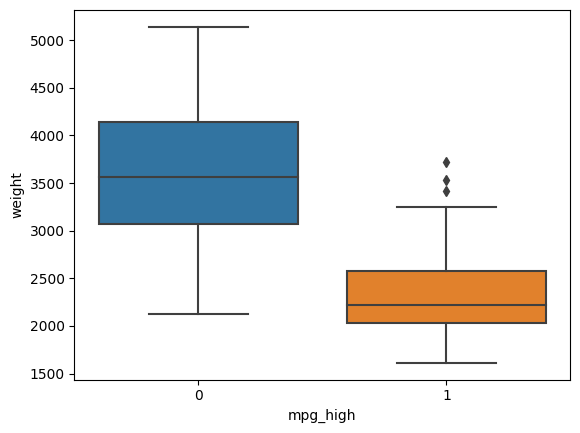

In [118]:
seaborn.boxplot(x=df['mpg_high'], y=df['weight'])
#High mile per hour cars have less weight and range

In [119]:
X = df.drop('mpg_high', axis=1)
y = df['mpg_high']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1234)


In [120]:
logReg = LogisticRegression(solver = 'lbfgs', max_iter=1000)
logReg.fit(X_train, y_train)
logReg.score(X_train, y_train)

y_pred = logReg.predict(X_test)

In [121]:
print("Logistic Regression:")
print("\tAccuracy score: ", accuracy_score(y_test, y_pred))
print("\tPrecision score: ", precision_score(y_test, y_pred))
print("\tRecall score: ", recall_score(y_test, y_pred))
print("\tf1 score: ", f1_score(y_test, y_pred))
print("\tScore: ", logReg.score(X_test, y_test))

print(classification_report(y_test, y_pred))

Logistic Regression:
	Accuracy score:  0.8589743589743589
	Precision score:  0.7297297297297297
	Recall score:  0.9642857142857143
	f1 score:  0.8307692307692307
	Score:  0.8589743589743589
              precision    recall  f1-score   support

           0       0.98      0.80      0.88        50
           1       0.73      0.96      0.83        28

    accuracy                           0.86        78
   macro avg       0.85      0.88      0.85        78
weighted avg       0.89      0.86      0.86        78



In [122]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [123]:
print("Deciscion Tree:")
print("\tAccuracy score: ", accuracy_score(y_test, y_pred))
print("\tPrecision score: ", precision_score(y_test, y_pred))
print("\tRecall score: ", recall_score(y_test, y_pred))
print("\tf1 score: ", f1_score(y_test, y_pred))
print("\tScore: ", logReg.score(X_test, y_test))

print(classification_report(y_test, y_pred))

Deciscion Tree:
	Accuracy score:  0.9230769230769231
	Precision score:  0.8666666666666667
	Recall score:  0.9285714285714286
	f1 score:  0.896551724137931
	Score:  0.8589743589743589
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.87      0.93      0.90        28

    accuracy                           0.92        78
   macro avg       0.91      0.92      0.92        78
weighted avg       0.93      0.92      0.92        78



In [124]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
nn = MLPRegressor(hidden_layer_sizes=(6,4,2), max_iter=6000, random_state=1234)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)

print("hidden_layer_sizes = (6, 4, 2)")
print("\tMSE: ", mean_squared_error(y_test, y_pred))
print("\tCorrelation: ", r2_score(y_test, y_pred))
print("\tScore: ", nn.score(X_test, y_test))

nn = MLPRegressor(hidden_layer_sizes=(20, 10), max_iter=6000, random_state=1234)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)

print("hidden_layer_sizes = (20, 10)")
print("\tMSE: ", mean_squared_error(y_test, y_pred))
print("\tCorrelation: ", r2_score(y_test, y_pred))
print("\tScore: ", nn.score(X_test, y_test))

nn = MLPRegressor(hidden_layer_sizes=(40, 20), max_iter=6000, random_state=1234)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)

print("hidden_layer_sizes = (40, 20)")
print("\tMSE: ", mean_squared_error(y_test, y_pred))
print("\tCorrelation: ", r2_score(y_test, y_pred))
print("\tScore: ", nn.score(X_test, y_test))

hidden_layer_sizes = (6, 4, 2)
	MSE:  0.09399738182341184
	Correlation:  0.5915142349902587
	Score:  0.5915142349902587
hidden_layer_sizes = (20, 10)
	MSE:  0.0800244863935673
	Correlation:  0.6522364462725261
	Score:  0.6522364462725261
hidden_layer_sizes = (40, 20)
	MSE:  0.06677452590875595
	Correlation:  0.7098169888365204
	Score:  0.7098169888365204


Comparing the 3 I used it seems like adding more nodes gave the network more room to make predicitons. The initial model used more layers but less nodes and didn't preform nearly as well as more nodes at each layer. I would assume this is because there are many more potential changes it can make to the weights with more nodes.

# Analysis

## Which algorithm performed better
Personally both my Decision and Logistic reression algorithms performed the same at around 85 percent

## compare accuracy, recall, and precision by class
In general is seemed a lot easier for the model to predict that something was low mpg. With an 90 and up for both models. Comparitively low mpg seemed to harder for my models to predict. This may have to do with the fact that there were a greater amount of outliers
Recall score seemed fairly consistent in general it didn't fluctuate model to model a lot
The f1 score was significantly higher for the decision tree model than the logistic

## Why Logistic and Decision Tree better
I would argue the main difference is that neural network neither had an optimized number of nodes and not enough data to be optimized. This would be the main reason for the differece between the models.

## My Experience
I strongly believe that my experience in python significantly was better than in R. Part of that is that I have many experiences in Python already making it my default. Also though I like the syntax of python more where there are more packages that I can use and easier ways to manipulate my dataframes. Finally the number of support resources for python far outstrips R even though sometimes documentation isn't as good.
